# Intro to Scikit-Learn (sklearn)

## This notebook displays basic functions of scikit-learn library

What are we covering:
0. End-to-end Scikit-Learn workflow
1. Get the data ready
2. Choose the right estimator (model, algorithm)
3. Fit the estimator (model, algorithm) to make predictions
4. Evaluate the model
5. Improve the model
6. Save & Load the model
7. Wrap up

## 0. End-to-end Scikit-Learn workflow

### 1. Get the data ready

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (label matrix)
y = heart_disease["target"]

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 2. Choose the right model and hyperparameters

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# Fit model to the training data and use test size percentage
# 80% data for training, 20% data for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train, X_test

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 4     57    0   0       120   354    0        1      163      1      0.6   
 32    44    1   1       130   219    0        0      188      0      0.0   
 266   55    0   0       180   327    0        2      117      1      3.4   
 104   50    1   2       129   196    0        1      163      0      0.0   
 284   61    1   0       140   207    0        0      138      1      1.9   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 145   70    1   1       156   245    0        0      143      0      0.0   
 209   59    1   0       140   177    0        1      162      1      0.0   
 21    44    1   2       130   233    0        1      179      1      0.4   
 144   76    0   2       140   197    0        2      116      0      1.1   
 165   67    1   0       160   286    0        0      108      1      1.5   
 
      slope  ca  thal  
 4        2   0     2  
 32       2   0     2  
 2

In [9]:
y_train, y_test

(4      1
 32     1
 266    0
 104    1
 284    0
       ..
 145    1
 209    0
 21     1
 144    1
 165    0
 Name: target, Length: 242, dtype: int64,
 25     1
 40     1
 78     1
 212    0
 269    0
       ..
 81     1
 96     1
 274    0
 298    0
 36     1
 Name: target, Length: 61, dtype: int64)

### 3. Fit the estimator

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_predictions = clf.predict(X_test)
y_predictions

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

### 4. Evaluate the model

In [12]:
# Evaluate model on training data and test data
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test, y_test)

0.7704918032786885

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [15]:
confusion_matrix(y_test, y_predictions)

array([[22,  7],
       [ 7, 25]], dtype=int64)

In [16]:
accuracy_score(y_test, y_predictions)

0.7704918032786885

### 5. Improve the model

In [17]:
# Try different amount of n_estimators
np.random.seed(42)
estimators_dict = {}
for i in range(10, 201, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    clf_score = clf.score(X_test, y_test)
    estimators_dict.update({i: clf_score})
    print(f"Model accuracy on test set: {clf_score * 100:.2f}%", end="\n\n")

best_estimator = max(estimators_dict, key=estimators_dict.get)
print(f"Best estimator value is {best_estimator} with accuracy of {estimators_dict[best_estimator] * 100:.2f}%")

# So now use the best model for our case
clf = RandomForestClassifier(n_estimators=best_estimator)
clf.fit(X_train, y_train)

Trying model with 10 estimators
Model accuracy on test set: 77.05%

Trying model with 20 estimators
Model accuracy on test set: 73.77%

Trying model with 30 estimators
Model accuracy on test set: 73.77%

Trying model with 40 estimators
Model accuracy on test set: 77.05%

Trying model with 50 estimators
Model accuracy on test set: 77.05%

Trying model with 60 estimators
Model accuracy on test set: 77.05%

Trying model with 70 estimators
Model accuracy on test set: 78.69%

Trying model with 80 estimators
Model accuracy on test set: 73.77%

Trying model with 90 estimators
Model accuracy on test set: 80.33%

Trying model with 100 estimators
Model accuracy on test set: 77.05%

Trying model with 110 estimators
Model accuracy on test set: 72.13%

Trying model with 120 estimators
Model accuracy on test set: 75.41%

Trying model with 130 estimators
Model accuracy on test set: 78.69%

Trying model with 140 estimators
Model accuracy on test set: 75.41%

Trying model with 150 estimators
Model accu

RandomForestClassifier(n_estimators=90)

### 6. Save & Load the model

In [18]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
str(round(loaded_model.score(X_test, y_test) * 100, 2)) + '%'

'78.69%'

#### To debug stuff

```python
import warnings
warning.filterwarnings("default")
```

#### Steps we have to do
1. Splitting the data into features and labels (`X` & `y`)
2. Filling (imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (feature encoding)

In [20]:
# axis = 1 ~> column
# axis = 0 ~> row
X = heart_disease.drop("target", axis=1)
y = heart_disease.target
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

### 1. Split the data into training and test sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

### 1.1 Making sure everything is numerical

In [23]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [24]:
# Split data
X = car_sales.drop("Price", axis=1)
y = car_sales.Price
X, y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White          35431      4
 1       BMW   Blue         192714      5
 2     Honda  White          84714      4
 3    Toyota  White         154365      4
 4    Nissan   Blue         181577      3
 ..      ...    ...            ...    ...
 995  Toyota  Black          35820      4
 996  Nissan  White         155144      3
 997  Nissan   Blue          66604      4
 998   Honda  White         215883      4
 999  Toyota   Blue         248360      4
 
 [1000 rows x 4 columns],
 0      15323
 1      19943
 2      28343
 3      13434
 4      14043
        ...  
 995    32042
 996     5716
 997    31570
 998     4001
 999    12732
 Name: Price, Length: 1000, dtype: int64)

In [25]:
# Transform string columns to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder(categories="auto")
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [26]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [27]:
# Split into training and test
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [28]:
transformed_X.shape, y.shape

((1000, 13), (1000,))

In [29]:
X_train, X_test, y_train, y_test

(array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.12004e+05],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 3.56730e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.46824e+05],
        ...,
        [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 6.18760e+04],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 2.86250e+04],
        [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 1.50582e+05]]),
 array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 1.96130e+05],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
         0.00000e+00, 2.23875e+05],
        [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
         0.00000e+00, 1.10490e+04],
        ...,
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1

In [30]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 Missing values

Strategies:
1. Fill nulls with some values (imputation)
2. Remove null rows

#### 1.2.1 Use Pandas package to fill NaN

In [31]:
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [32]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
car_sales.Doors.value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [34]:
# Newest scikit-learn libraries handle NaN values so there is no error in the next code block
# Let's still fill for practice
car_sales.Make = car_sales.Make.fillna("missing")
car_sales.Colour = car_sales.Colour.fillna("missing")
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean())
car_sales.Doors = car_sales.Doors.fillna(4) # Given the above block has most cars with 4 doors

In [35]:
car_sales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
# Remove rows without Price
car_sales.dropna(inplace=True)
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [37]:
car_sales.count

<bound method DataFrame.count of         Make Colour  Odometer (KM)  Doors    Price
0      Honda  White        35431.0    4.0  15323.0
1        BMW   Blue       192714.0    5.0  19943.0
2      Honda  White        84714.0    4.0  28343.0
3     Toyota  White       154365.0    4.0  13434.0
4     Nissan   Blue       181577.0    3.0  14043.0
..       ...    ...            ...    ...      ...
995   Toyota  Black        35820.0    4.0  32042.0
996  missing  White       155144.0    3.0   5716.0
997   Nissan   Blue        66604.0    4.0  31570.0
998    Honda  White       215883.0    4.0   4001.0
999   Toyota   Blue       248360.0    4.0  12732.0

[950 rows x 5 columns]>

In [38]:
X = car_sales.drop("Price", axis=1)
y = car_sales.Price

In [39]:
# Transform string columns to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder(categories="auto")
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_X = transformer.fit_transform(car_sales)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### 1.2.2 Use Scikit-Learn package to fill NaN

In [40]:
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Drop no price rows
car_sales.dropna(subset=["Price"], inplace=True)
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

X = car_sales.drop("Price", axis=1)
y = car_sales.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing | numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create imputer: something that fills missing data
imputer = ColumnTransformer(
    [
        ("cat_imputer", cat_imputer, cat_features),
        ("door_imputer", door_imputer, door_features),
        ("num_imputer", num_imputer, num_features)
    ]
)

# Transform the data for training and test data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)
filled_X_train, filled_X_test

(array([['Honda', 'White', 4.0, 71934.0],
        ['Toyota', 'Red', 4.0, 162665.0],
        ['Honda', 'White', 4.0, 42844.0],
        ...,
        ['Toyota', 'White', 4.0, 196225.0],
        ['Honda', 'Blue', 4.0, 133117.0],
        ['Honda', 'missing', 4.0, 150582.0]], dtype=object),
 array([['Toyota', 'Blue', 4.0, 99761.0],
        ['Toyota', 'Black', 4.0, 17975.0],
        ['Honda', 'Blue', 4.0, 197664.0],
        ['Nissan', 'Green', 4.0, 235589.0],
        ['Honda', 'Black', 4.0, 231659.0],
        ['Toyota', 'Blue', 4.0, 247601.0],
        ['Toyota', 'Green', 4.0, 110078.0],
        ['missing', 'White', 4.0, 155383.0],
        ['Nissan', 'White', 4.0, 26634.0],
        ['Honda', 'White', 4.0, 133706.16853932585],
        ['Honda', 'Green', 4.0, 238825.0],
        ['Honda', 'Green', 4.0, 37606.0],
        ['Toyota', 'Blue', 4.0, 230908.0],
        ['Toyota', 'Red', 4.0, 159925.0],
        ['Toyota', 'Blue', 4.0, 181466.0],
        ['Toyota', 'Blue', 4.0, 140465.0],
        ['Toyota

In [44]:
# Fill both train and test
car_sales_fill_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_fill_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_fill_train.isna().sum(), car_sales_fill_test.isna().sum()

(Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64,
 Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64)

In [45]:
# Transform string columns to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder(categories="auto")
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
transformed_X_train = transformer.fit_transform(car_sales_fill_train)
transformed_X_test = transformer.fit_transform(car_sales_fill_test)
transformed_X_train, transformed_X_test

(<760x15 sparse matrix of type '<class 'numpy.float64'>'
 	with 3040 stored elements in Compressed Sparse Row format>,
 <190x15 sparse matrix of type '<class 'numpy.float64'>'
 	with 760 stored elements in Compressed Sparse Row format>)

In [46]:
# Fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.25366332156443805

## Choosing the right estimator / algorithm / model

* Sklearn refers to ML models or algorithms as estimators.
* Classification problem - predicting a category (eg. heart disease or not)
    * Common classification variable name is `clf`
* Regression problem - predicting a number (eg. selling price of a car)

If you are not sure which model to use in Sklearn refer to sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/

### 2.1 Picking an ML model for a Regression model

In [47]:
# California housing dataset in sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
# https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [48]:
california_housing_df = pd.DataFrame(
    california_housing["data"],
    columns=california_housing["feature_names"] # columns is not needed in this version of jupyter notebooks
)
california_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [49]:
california_housing_df["target"] = california_housing.target
try:
    california_housing_df.drop("MedHouseVal", axis=1, inplace=True)
except:
    pass
california_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 2.1.1 RidgeRegressor

In [50]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

# Create data
X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
# First let's try Ridge regressor: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
from sklearn.linear_model import Ridge

# Instantiate
model = Ridge()
model.fit(X_train, y_train)

# Check score
model.score(X_test, y_test)
# Coefficient of Determination: measures the linear relationship between variables (R²)

0.5758549611440131

#### 2.1.2 Lasso

In [51]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

# Create data
X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
# First let's try Lasso regressor: https://scikit-learn.org/stable/modules/linear_model.html#lasso
from sklearn.linear_model import Lasso

# Instantiate
model = Lasso()
model.fit(X_train, y_train)

# Check score
model.score(X_test, y_test)

0.2841671821008396

#### 2.1.3 ElasticNet

In [52]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

# Create data
X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
# First let's try Lasso regressor: https://scikit-learn.org/stable/modules/linear_model.html#elastic-net
from sklearn.linear_model import ElasticNet

# Instantiate
model = ElasticNet()
model.fit(X_train, y_train)

# Check score
model.score(X_test, y_test)

0.41655189098028245

#### 2.1.4 EnsembleRegressors

A combination of smaller models that try to make predictions than just a single model

In [53]:
# https://scikit-learn.org/stable/modules/ensemble.html
np.random.seed(42)
from sklearn.model_selection import train_test_split

# Create data
X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
# Let's use RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

# Instantiate
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check score
model.score(X_test, y_test)

0.8065734772187598

### 2.2 Picking an ML model for a Classification model

In [54]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### 2.2.1 LinearSVC

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Data
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
clf = LinearSVC(dual="auto", max_iter=5000)
clf.fit(X_train, y_train)

# Evaluate
clf.score(X_test, y_test)

0.8688524590163934

#### 2.2.2 EnsembleClassifiers

In [56]:
# https://scikit-learn.org/stable/modules/ensemble.html
np.random.seed(42)
from sklearn.model_selection import train_test_split

# Create data
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
# Let's use RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Instantiate
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

# Check score
clf.score(X_test, y_test)

0.8688524590163934

1. If we have structured data, use ensemble methods
2. If we have unstructured data, use deep learning or knowledge transfer learning

## 3. Fit the model on our data in order to make predictions
### 3.1 Fitting the model to the data

Slang for variables:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables, ground truth

### 3.2 Making predictions using an ML model

2 functions to make predictions:
1. `predict()`
2. `predict_proba()`

In [57]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


### 3.2.1 Predict

In [58]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [59]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
# Compare the predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) # The same as clf.score(X_test, y_test)

0.8688524590163934

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) # The same as clf.score and np.mean

0.8688524590163934

### 3.2.2 Predict_proba

Returns probabilities of a classification label

In [62]:
# Compare the 5 first values of the 2 methods
# For example:
# 0.89 > 0.1 ~> 0
# 0.4 < 0.5 ~> 1

clf.predict_proba(X_test)[:5], clf.predict(X_test)[:5]

(array([[0.894, 0.106],
        [0.435, 0.565],
        [0.455, 0.545],
        [0.871, 0.129],
        [0.23 , 0.77 ]]),
 array([0, 1, 1, 0, 1], dtype=int64))

In [63]:
# Compare the predictions to truth labels to evaluate the model
y_preds_proba = clf.predict_proba(X_test)

# 0 or 1 based on a > b or b > a
y_preds_binary_list = (y_preds_proba[:, 0] <= y_preds_proba[:, 1]).astype(int)

# Check if the result is exactly the same
np.mean(y_preds_binary_list == y_preds)

1.0

`predict()` can also be used for Regression Models

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Data
X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Instance
model = RandomForestRegressor(n_estimators=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_preds = model.predict(X_test)
y_preds[:10], np.array(y_test[:10])

(array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
        2.34323  , 1.66182  , 2.47489  , 4.8344779]),
 array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]))

In [65]:
len(y_preds), len(y_test)

(4128, 4128)

In [66]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [67]:
california_housing_df.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating an ML

3 ways to evaluate scikit-learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

For more visit: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating with the `score` method

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
model = RandomForestClassifier(n_estimators=50)

# Fit
model.fit(X_train, y_train)

# Evaluate
model.score(X_test, y_test)

0.8852459016393442

In [69]:
# The default score evaluation metric is r² for regression algorithms. Min: 0, Max: 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
model = RandomForestRegressor(n_estimators=50)

# Fit
model.fit(X_train, y_train)

# Evaluate
model.score(X_test, y_test)

0.5483896551724138

## 4.2 Evaluating using the `scoring` parameter

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
model = RandomForestClassifier(n_estimators=50)

# Fit
model.fit(X_train, y_train)

# Evaluate
cross_val_score(estimator=model, X=X, y=y, cv=10)

array([0.90322581, 0.83870968, 0.80645161, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.7       , 0.76666667])

In [71]:
# The default scoring parameter of classifier is mean accuracy
# Compare
np.random.seed(42)
(
    model.score(X_test, y_test),
    np.mean(cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=None)),
    np.max(cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=None)),
    np.min(cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=None))
)

(0.8852459016393442, 0.8317204301075268, 0.9, 0.7)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### 4.2.1.1 Accuracy

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

model = RandomForestClassifier(n_estimators=100)
cross_val_score(model, X, y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [73]:
np.random.seed(42)
print(f"Heart Disease Classifier Cross-Validated Accuracy: {round(np.mean(cross_val_score(model, X, y)) * 100, 2)}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### 4.2.1.2 Area under ROC curve (AUC/ROC)

* Area under curve(AUC)
* ROC curve

ROC curves are a comparison of a model's True Positive (TPR) versus a model's False Positive Rate (FPR)

In [74]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [75]:
y_probs_positive = y_probs[:, 1]
y_probs_negative = y_probs[:, 0]
y_probs_positive, y_probs_negative

(array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
        0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
        0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
        0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
        0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
        0.07, 0.29, 0.99, 0.13, 0.  , 0.14]),
 array([0.89, 0.49, 0.43, 0.84, 0.18, 0.14, 0.36, 0.95, 0.99, 0.47, 0.26,
        0.7 , 0.11, 0.95, 0.03, 0.02, 0.01, 0.84, 0.95, 0.98, 0.51, 0.89,
        0.38, 0.29, 0.26, 0.34, 0.2 , 0.22, 0.83, 0.15, 0.94, 0.92, 0.96,
        0.62, 0.46, 0.89, 0.44, 0.16, 0.33, 0.08, 0.13, 0.17, 0.18, 0.38,
        0.32, 0.77, 0.39, 0.  , 0.83, 0.97, 0.85, 0.8 , 0.25, 0.25, 0.87,
        0.93, 0.71, 0.01, 0.87, 1.  , 0.86]))

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr, tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
        0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
        0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
        0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 1.     , 1.     , 1.     ]))

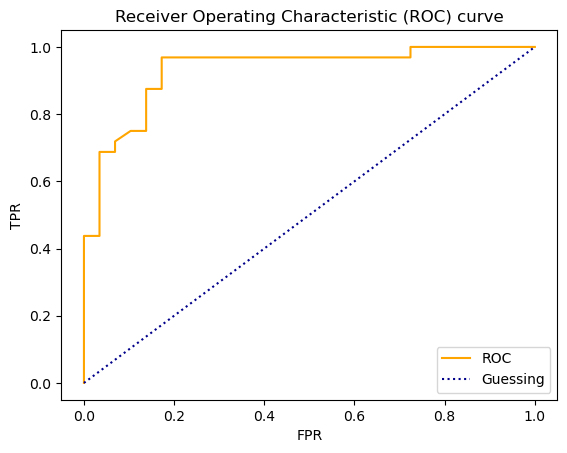

In [77]:
# Function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the False Positive Rate and True Positive Rate of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], color="darkblue", linestyle="dotted", label="Guessing")
    # Axis
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [78]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

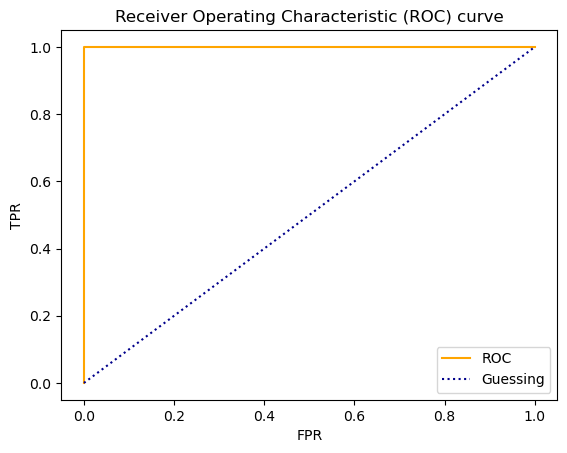

In [79]:
# Plot the perfect ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test)

1.0

#### 4.1.2.3 Confusion Matrix

A Confusion Matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essense, it gives us an idea of where the model is getting confused.

In [81]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [82]:
# Visualize the Confusion Matrix with pd.crosstab()
pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual Labels"],
    colnames=["Predicted Labels"]
)

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


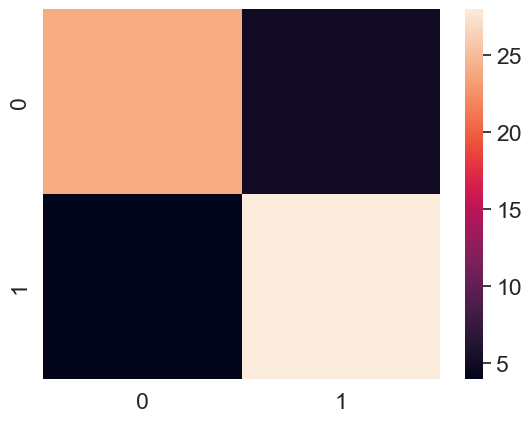

In [83]:
# Confusion Matrix visualization with Seaborn's Heatmap: plots rectangular data
import seaborn as sns

# Set font scale
sns.set(font_scale=1.5)

# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

# Plot
sns.heatmap(cm);

**We can also directly install a package from here if missing**
```python
import sys
!conda install --yes --prefix {sys.prefix} seaborn
```

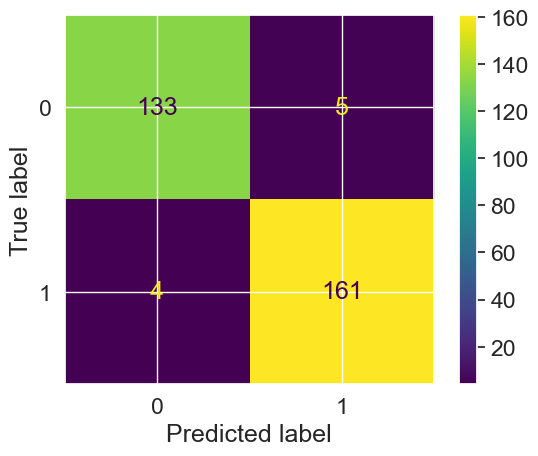

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);

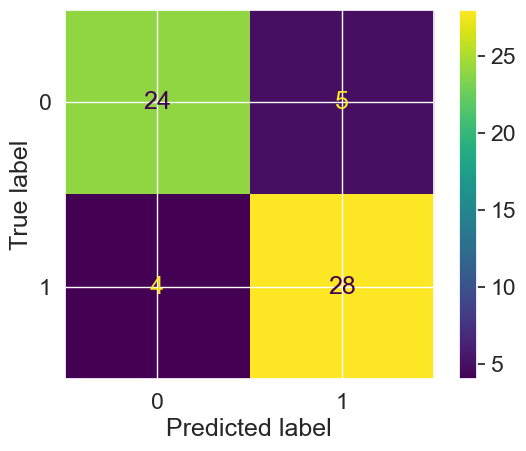

In [85]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

#### 4.1.2.4 Classification Report

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [87]:
# Where precision and recall become valueable

heart_disease_true = np.zeros(10000)
heart_disease_true[0] = 1 # only one positive case

heart_disease_preds = np.zeros(10000) # model predicts every case as zero

pd.DataFrame(classification_report(heart_disease_true, heart_disease_preds, output_dict=True, zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 4.2.1 Regression Model evaluation metrics

Doc: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Covered:
1. R² (R squared - coefficient of determination)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

#### 4.2.1.1 R²

In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8065734772187598

In [89]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [90]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [91]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

#### 4.2.1.2 Mean Absolute Error (MAE)

The average of the absolute differences between predictions and actual values.
Gives an idea of how wrong the model predictions are.

In [92]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [93]:
df = pd.DataFrame(data={"Actual Values": y_test, "Predicted Values": y_preds})
df["differences"] = df["Predicted Values"] - df["Actual Values"]
df

,Actual Values,Predicted Values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [94]:
# MAE using formulas and differences
df.differences.mean(), np.abs(df["differences"]).mean()

(0.012048392126937589, 0.32659871732073664)

#### 4.2.1.3 Mean Squared Error (MSE)

The mean of the square of the errors between actual and predicted values.

In [95]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [96]:
# Squared decimals become smaller and positive
df["squared_differences"] = np.square(df["differences"])
df

,Actual Values,Predicted Values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [97]:
# MSE manually
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [98]:
df.iloc[0]

Actual Values          0.477000
Predicted Values       0.493840
differences            0.016840
squared_differences    0.000284
Name: 20046, dtype: float64

In [99]:
# Simulate a large error
df_large_error = df.copy(deep=True)

df_large_error.loc[df_large_error.index[0], "squared_differences"] = 16

df_large_error

,Actual Values,Predicted Values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [100]:
df_large_error["squared_differences"].mean()

0.2573437523766412

In [101]:
# Simulate many large errors
df_large_error = df.copy(deep=True)

df_large_error.loc[df_large_error.index[0:100], "squared_differences"] = 20

df_large_error

,Actual Values,Predicted Values,differences,squared_differences
20046,0.47700,0.493840,0.016840,20.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.543160,0.357160,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [102]:
df_large_error["squared_differences"].mean()

0.7343870634568727

## 4.2.3 Using the `scoring` parameter
#### 4.2.3.1 Classification

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease.target

model = RandomForestClassifier(n_estimators=100)

# Cross Validation Accuracy
cv_acc = cross_val_score(model, X, y, cv=5, scoring=None) # If scoring = "None" the default estimator's scoring evaluation metric is used
print(f"The Cross-Validated Accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The Cross-Validated Accuracy is: 82.48%


In [104]:
# Cross Validation Accuracy
np.random.seed(42)
cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print(f"The Cross-Validated Accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The Cross-Validated Accuracy is: 82.48%


In [105]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
print(f"The Cross-Validated Precision is: {np.mean(cv_precision) * 100:.2f}%")

The Cross-Validated Precision is: 83.30%


In [106]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")
print(f"The Cross-Validated Recall is: {np.mean(cv_recall) * 100:.2f}%")

# Recall Weighted
cv_recall_weight = cross_val_score(model, X, y, cv=5, scoring="recall_weighted")
print(f"The Cross-Validated Recall Weighted is: {np.mean(cv_recall_weight) * 100:.2f}%")

The Cross-Validated Recall is: 85.45%
The Cross-Validated Recall Weighted is: 80.18%


In [107]:
# F1
np.random.seed(42)
cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1")
print(f"The Cross-Validated F1 is: {np.mean(cv_f1) * 100:.2f}%")

# F1 Weighted
cv_f1_weighted = cross_val_score(model, X, y, cv=5, scoring="f1_weighted")
print(f"The Cross-Validated F1 Weighted is: {np.mean(cv_f1_weighted) * 100:.2f}%")

The Cross-Validated F1 is: 84.27%
The Cross-Validated F1 Weighted is: 80.03%


#### 4.2.3.2 Regression

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

model = RandomForestRegressor(n_estimators=100)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
print(f"The Cross-Validated R² is: {np.mean(cv_r2) * 100:.2f}%")

The Cross-Validated R² is: 65.21%


In [109]:
# Mean Absolute Error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The Cross-Validated Mean Absolute Error is: {np.mean(cv_mae) * 100:.2f}%")

The Cross-Validated Mean Absolute Error is: -46.57%


In [110]:
# Mean Squared Error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
print(f"The Cross-Validated Mean Squared Error is: {np.mean(cv_mse) * 100:.2f}%")

The Cross-Validated Mean Squared Error is: -42.94%


## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn ML models/estimators is by using the `sklearn.metrics`: https://scikit-learn.org/stable/modules/model_evaluation.html

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
model = RandomForestClassifier(n_estimators=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_preds = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_preds) * 100
pre = precision_score(y_test, y_preds) * 100
rec = recall_score(y_test, y_preds) * 100
f1s = f1_score(y_test, y_preds) * 100

print("Classifier score")
print(f"Accuracy: {round(acc, 2)}%")
print(f"Precision: {round(pre, 2)}%")
print(f"Recall: {round(rec, 2)}%")
print(f"F1: {round(f1s, 2)}%")

Classifier score
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.5%
F1: 86.15%


In [115]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# X, y
X = california_housing_df.drop("target", axis=1)
y = california_housing_df.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
model = RandomForestRegressor(n_estimators=100)

# Fit
model.fit(X_train, y_train)

# Predict
y_preds = model.predict(X_test)

# Evaluate
r2s = r2_score(y_test, y_preds) * 100
mae = mean_absolute_error(y_test, y_preds) * 100
mse = mean_squared_error(y_test, y_preds) * 100

print("Regressor score")
print(f"R²: {round(r2s, 2)}%")
print(f"Mean Absolute Error: {round(mae, 2)}%")
print(f"Mean Squared Error: {round(mse, 2)}%")

Regressor score
R²: 80.66%
Mean Absolute Error: 32.66%
Mean Squared Error: 25.35%


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Can we collect more data? - The more data, the better the predictions.
* Can we improve the data? - The better / more complete data, the better the predictions.

From a model perspective:
* Is there a better model? - Follow the map and try out multiple model predictions.
* Can we improve current model? - Adjust model settings via their parameters.

Params vs Hyperparams
* Parameters = model find these patterns in data
* Hyperparameters = global settings on a model to adjust

3 ways to adjust:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCv

In [118]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Hyperparameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparams by hand

3 Sets: Training, Validation, Test

To modify:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#randomforestclassifier

In [125]:
# Function for classifier evaluation
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on `y_true` vs `y_pred` labels.
    """
    acc = round(accuracy_score(y_true, y_preds), 2) * 100
    pre = round(precision_score(y_true, y_preds), 2) * 100
    rec = round(recall_score(y_true, y_preds), 2) * 100
    f1s = round(f1_score(y_true, y_preds), 2) * 100
    metric_dict = {
        "accuracy": acc,
        "precision": pre,
        "recall": rec,
        "f1": f1s
    }
    return metric_dict

In [156]:
# Manual split to training, validation, testing datasets
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X, y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Manual split of train, validate, test data
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(0.15 * len(heart_disease_shuffled) + train_split)

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Instantiate
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features="log2",
    min_samples_leaf=3,
    min_samples_split=3
)

# Fit
model.fit(X_train, y_train)

# Baseline
y_preds = model.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

# n_estimators = 10
# Result: {'accuracy': 80.0, 'precision': 77.0, 'recall': 92.0, 'f1': 84.0}

# n_estimators = 100
# Result: {'accuracy': 82.0, 'precision': 81.0, 'recall': 88.0, 'f1': 85.0}

# n_estimators = 1000
# Result: {'accuracy': 82.0, 'precision': 81.0, 'recall': 88.0, 'f1': 85.0}

# n_estimators = 100
# max_depth = 10
# Result: {'accuracy': 82.0, 'precision': 81.0, 'recall': 88.0, 'f1': 85.0}

# n_estimators = 100
# max_depth = 10
# max_features = log2
# Result: {'accuracy': 82.0, 'precision': 81.0, 'recall': 88.0, 'f1': 85.0}

# n_estimators = 100
# max_depth = 10
# max_features = log2
# min_samples_leaf = 3
# Result: {'accuracy': 84.0, 'precision': 82.0, 'recall': 92.0, 'f1': 87.0}

# n_estimators = 100
# max_depth = 10
# max_features = log2
# min_samples_leaf = 3
# min_samples_split = 3
# Result: {'accuracy': 84.0, 'precision': 82.0, 'recall': 92.0, 'f1': 87.0}

{'accuracy': 84.0, 'precision': 82.0, 'recall': 92.0, 'f1': 87.0}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1500],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": [None, "sqrt", "log2"],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10],
}

np.random.seed(42)

# Split X, y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
model = RandomForestClassifier(n_jobs = None) # Use ALL of the CPU + RAM

# Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(
    estimator=model,
    param_distributions=grid,
    n_iter=5, # number of models to try
    cv=5,
    verbose=2
)

# Fit the RandomizedSearchCV version of our model
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n

In [178]:
# Show the best parameters
# These are saved as the best ones in the rs_model
rs_model.best_params_

{'n_estimators': 1500,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 5}

In [179]:
# Make predictions with the best hyperparams
rs_y_preds = rs_model.predict(X_test)

# Evaluate
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

{'accuracy': 84.0, 'precision': 78.0, 'recall': 89.0, 'f1': 83.0}

### 5.3 Hyperparameter tyning with GridSearchCV

Bruteforce

In [180]:
# 2 * 2 * 2 * 2 * 1 = 16 * 5 (cv) = 80 fits
grid = {
    "n_estimators": [100, 1500],
    "max_depth": [None, 5],
    "max_features": [None, "sqrt"],
    "min_samples_leaf": [2, 4],
    "min_samples_split": [6],
}

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Split X, y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled.target

# Split train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate
model = RandomForestClassifier(n_jobs = None) # Use ALL of the CPU + RAM

# Setup GridSearchCV
gs_model = GridSearchCV(
    estimator=model,
    param_grid=grid,
    cv=5,
    verbose=2
)

# Fit the RandomizedSearchCV version of our model
gs_model.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.9s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=6

In [181]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 1500}

In [186]:
gs_y_preds = gs_model.predict(X_test)

# Evaluate
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

{'accuracy': 84.0, 'precision': 78.0, 'recall': 89.0, 'f1': 83.0}

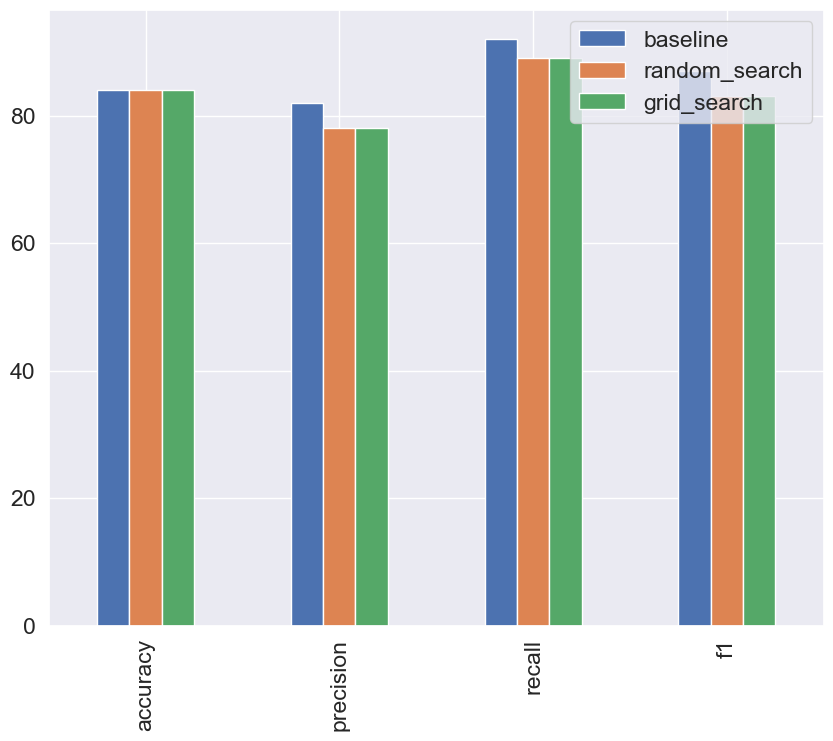

In [189]:
# Compare models metrics
compare_metrics = pd.DataFrame(
    {
        "baseline": baseline_metrics,
        "random_search": rs_metrics,
        "grid_search": gs_metrics,
    }
)
compare_metrics.plot.bar(figsize=(10, 8));

## 6. Save and load a trained model

2 ways to save and load ML models:
1. With Python's `pickle` module
2. With `joblib` module

### 6.1 Pickle

In [198]:
# Export via pickle
import pickle

# Save existing model to file
pickle.dump(gs_model, open("gs_random_forest_model.pkl", "wb"))

In [199]:
# Load via pickle
import pickle

loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl", "rb"))

In [200]:
# Make some predictions with loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
pickle_evaluation = evaluate_preds(y_test, pickle_y_preds)
pickle_evaluation

{'accuracy': 84.0, 'precision': 78.0, 'recall': 89.0, 'f1': 83.0}

### 6.2 Joblib

In [201]:
# Export via joblib
from joblib import dump, load

# Save model to file
dump(gs_model, "gs_random_forest_model.joblib")

['gs_random_forest_model.joblib']

In [202]:
# Load via joblib
loaded_joblib_model = load("gs_random_forest_model.joblib")

In [203]:
# Make some predictions with loaded model
joblib_y_preds = loaded_joblib_model.predict(X_test)
joblib_evaluation = evaluate_preds(y_test, joblib_y_preds)
joblib_evaluation

{'accuracy': 84.0, 'precision': 78.0, 'recall': 89.0, 'f1': 83.0}

## 7. Putting it all together

In [204]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [205]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [206]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps all in one cell:
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [222]:
# Data processing
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows without labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]
)

door_feature = ["Doors"]
door_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="constant", fill_value=4)),
    ]
)

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="mean"))
    ]
)

# Fill missing values and convert to numbers
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("numeric", numeric_transformer, numeric_features)
    ]
)

# Create a preprocessing and modelling pipeline
model = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor())
    ]
)

# Split
X = data.drop("Price", axis=1)
y = data.Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit
model.fit(X_train, y_train)

# Score
model.score(X_test, y_test)

0.22188417408787875

We can use `GridSearchCV` or `RandomizedSearchCV` with our Pipeline.

In [225]:
from sklearn.model_selection import GridSearchCV

# The name is built based on the previous definitions. See preprocessor > numeric (transformer) > imputer (numeric_transformer)
pipe_grid = {
    "preprocessor__numeric__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [None],
    "model__min_samples_split": [2, 4],
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=None, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=No

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [None],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__numeric__imputer__strategy': ['mean',
                                                                      'median']},
             verbose=2)

In [226]:
gs_model.score(X_test, y_test)

0.3339554263158365